# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress,stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

ModuleNotFoundError: No module named 'api_keys'

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 614


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = requests.get(query_url + city).json()
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = city_url['weather'][0]['main']
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_url['coord']['lat']
        city_lng = city_url['coord']['lon']
        city_max_temp = city_url['main']['temp_max']
        city_humidity = city_url['main']['humidity']
        city_clouds = city_url['clouds']['all']
        city_wind = city_url['wind']['speed']
        city_country = city_url['sys']['country']
        city_date = city_url['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 1 | sofiysk
City not found. Skipping...
Processing Record 3 of Set 1 | addis abeba
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | belmonte
Processing Record 6 of Set 1 | bafoulabe
Processing Record 7 of Set 1 | provideniya
Processing Record 8 of Set 1 | nyurba
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | new norfolk
Processing Record 12 of Set 1 | grenville
Processing Record 13 of Set 1 | butaritari
Processing Record 14 of Set 1 | okhotsk
Processing Record 15 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 16 of Set 1 | avarua
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | estevan
Processing Record 19 of Set 1 | moosomin
Processing Record 20 of Set 1 | hauterive
Processing Record 21 of Set 1 | hasaki
Processing Record 22 of 

Processing Record 37 of Set 4 | wageningen
Processing Record 38 of Set 4 | evensk
Processing Record 39 of Set 4 | garh maharaja
Processing Record 40 of Set 4 | zalantun
Processing Record 41 of Set 4 | alice springs
Processing Record 42 of Set 4 | satitoa
City not found. Skipping...
Processing Record 43 of Set 4 | east london
Processing Record 44 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 45 of Set 4 | toliary
City not found. Skipping...
Processing Record 46 of Set 4 | chuy
Processing Record 47 of Set 4 | karkaralinsk
City not found. Skipping...
Processing Record 48 of Set 4 | invermere
Processing Record 49 of Set 4 | arvika
Processing Record 0 of Set 5 | fremont
Processing Record 1 of Set 5 | makung
City not found. Skipping...
Processing Record 2 of Set 5 | hovd
Processing Record 3 of Set 5 | kaitangata
Processing Record 4 of Set 5 | asfi
Processing Record 5 of Set 5 | altay
Processing Record 6 of Set 5 | dickinson
Processing Record 7 of Set 5 | bouloupari
Pro

Processing Record 27 of Set 8 | gizo
Processing Record 28 of Set 8 | cseteny
Processing Record 29 of Set 8 | te anau
Processing Record 30 of Set 8 | chaoyang
Processing Record 31 of Set 8 | ponferrada
Processing Record 32 of Set 8 | broome
Processing Record 33 of Set 8 | sambava
Processing Record 34 of Set 8 | liberal
Processing Record 35 of Set 8 | mbini
Processing Record 36 of Set 8 | mendoza
Processing Record 37 of Set 8 | hit
Processing Record 38 of Set 8 | carauari
Processing Record 39 of Set 8 | margate
Processing Record 40 of Set 8 | mocambique
City not found. Skipping...
Processing Record 41 of Set 8 | gandajika
Processing Record 42 of Set 8 | mormugao
Processing Record 43 of Set 8 | asyut
Processing Record 44 of Set 8 | lokosovo
Processing Record 45 of Set 8 | chichimila
Processing Record 46 of Set 8 | wajima
Processing Record 47 of Set 8 | paidha
Processing Record 48 of Set 8 | mumbwa
Processing Record 49 of Set 8 | wasilla
Processing Record 0 of Set 9 | tukums
Processing Rec

Processing Record 13 of Set 12 | pallisa
Processing Record 14 of Set 12 | lexington
Processing Record 15 of Set 12 | acapulco
Processing Record 16 of Set 12 | yeppoon
Processing Record 17 of Set 12 | trenggalek
Processing Record 18 of Set 12 | sechura
Processing Record 19 of Set 12 | salalah
Processing Record 20 of Set 12 | mehran
Processing Record 21 of Set 12 | benjamin hill
Processing Record 22 of Set 12 | navolato
Processing Record 23 of Set 12 | sai buri
Processing Record 24 of Set 12 | segezha
Processing Record 25 of Set 12 | dunkwa
Processing Record 26 of Set 12 | naze
Processing Record 27 of Set 12 | amapa
Processing Record 28 of Set 12 | grand-santi
Processing Record 29 of Set 12 | bafq
Processing Record 30 of Set 12 | sorvag
City not found. Skipping...
Processing Record 31 of Set 12 | phan thiet
Processing Record 32 of Set 12 | necochea
Processing Record 33 of Set 12 | iralaya
Processing Record 34 of Set 12 | octeville
Processing Record 35 of Set 12 | forio
Processing Record 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,atuona,-9.8000,-139.0333,25.17,81,31,6.31,PF,1667534564
1,addis abeba,9.0250,38.7469,10.49,76,44,1.14,ET,1667534401
2,bredasdorp,-34.5322,20.0403,17.69,94,97,5.37,ZA,1667534624
3,belmonte,-15.8631,-38.8828,20.36,90,100,7.48,BR,1667534624
4,bafoulabe,13.8065,-10.8321,22.26,21,0,1.15,ML,1667534625


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,atuona,-9.8000,-139.0333,25.17,81,31,6.31,PF,1667534564
1,addis abeba,9.0250,38.7469,10.49,76,44,1.14,ET,1667534401
2,bredasdorp,-34.5322,20.0403,17.69,94,97,5.37,ZA,1667534624
3,belmonte,-15.8631,-38.8828,20.36,90,100,7.48,BR,1667534624
4,bafoulabe,13.8065,-10.8321,22.26,21,0,1.15,ML,1667534625


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

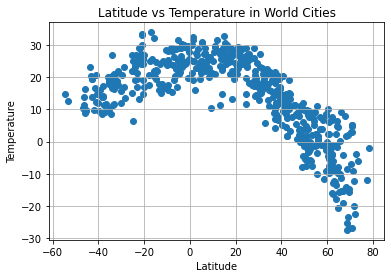

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Temperature in World Cities")
plt.ylabel("Temperature")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
##plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

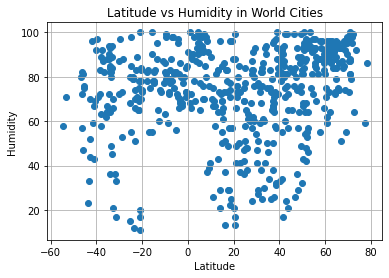

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Humidity in World Cities")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
##plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

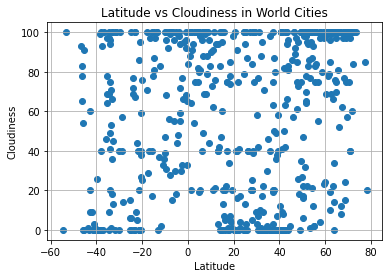

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Cloudiness in World Cities")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
##plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

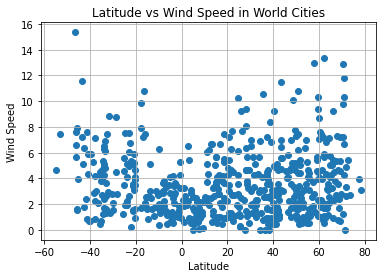

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Wind Speed in World Cities")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
##plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def get_linear_regress(x,y,xlabel, ylabel, title):
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    # Create Plot
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")

    # Label plot and annotate the line equation
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.annotate(line_eq,(20,15),fontsize=15,color="red")

    # Print r value
    #print(f"The r-value is: {rvalue**2}")

    # Show plot
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,addis abeba,9.0250,38.7469,10.49,76,44,1.14,ET,1667534401
4,bafoulabe,13.8065,-10.8321,22.26,21,0,1.15,ML,1667534625
5,provideniya,64.3833,-173.3000,-8.37,72,100,2.59,RU,1667534625
6,nyurba,63.2842,118.3319,-12.55,84,66,4.34,RU,1667534625
10,grenville,12.1167,-61.6167,28.03,81,94,6.20,GD,1667534626


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,atuona,-9.8000,-139.0333,25.17,81,31,6.31,PF,1667534564
2,bredasdorp,-34.5322,20.0403,17.69,94,97,5.37,ZA,1667534624
3,belmonte,-15.8631,-38.8828,20.36,90,100,7.48,BR,1667534624
7,punta arenas,-53.1500,-70.9167,12.73,71,100,7.46,CL,1667534565
8,ushuaia,-54.8000,-68.3000,14.81,58,0,4.63,AR,1667534626


###  Temperature vs. Latitude Linear Regression Plot

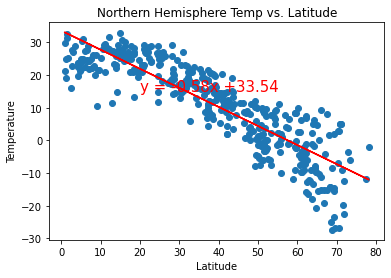

In [15]:
# Linear regression on Northern Hemisphere
# Create Plot
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
xlabel = 'Latitude'
ylabel = 'Temperature'
title = 'Northern Hemisphere Temp vs. Latitude'
get_linear_regress(x_values,y_values,xlabel, ylabel,title)

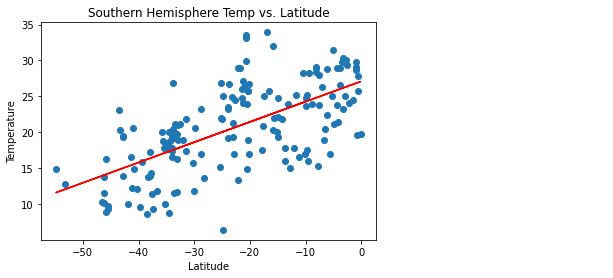

In [16]:
# Linear regression on Southern Hemisphere
# Create Plot
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
xlabel = 'Latitude'
ylabel = 'Temperature'
title = 'Southern Hemisphere Temp vs. Latitude'
get_linear_regress(x_values,y_values,xlabel, ylabel,title)

Discussion about the linear relationship:The temp vs. latitude linear graph shows clustering at approximately at 0 degrees.

### Humidity vs. Latitude Linear Regression Plot

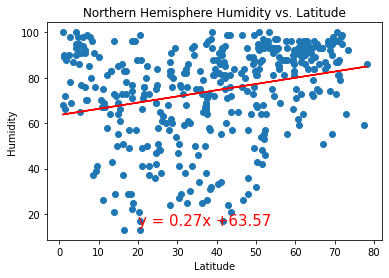

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
xlabel = 'Latitude'
ylabel = 'Humidity'
title = 'Northern Hemisphere Humidity vs. Latitude'
get_linear_regress(x_values,y_values,xlabel, ylabel,title)

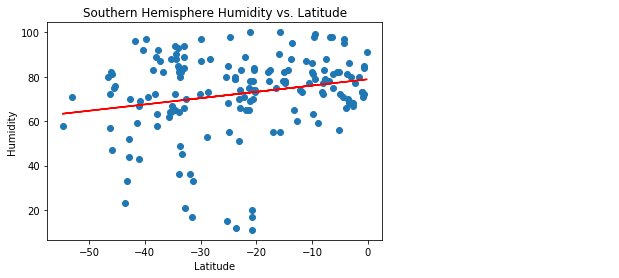

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
xlabel = 'Latitude'
ylabel = 'Humidity'
title = 'Southern Hemisphere Humidity vs. Latitude'
get_linear_regress(x_values,y_values,xlabel, ylabel,title)

Discussion about the linear relationship: This linear relationship graph shows there's a strong positve relationship between latitide in humdiity in latitudes from -20 to 0

### Cloudiness vs. Latitude Linear Regression Plot

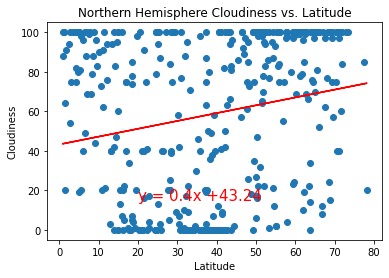

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
xlabel = 'Latitude'
ylabel = 'Cloudiness'
title = 'Northern Hemisphere Cloudiness vs. Latitude'
get_linear_regress(x_values,y_values,xlabel, ylabel,title)

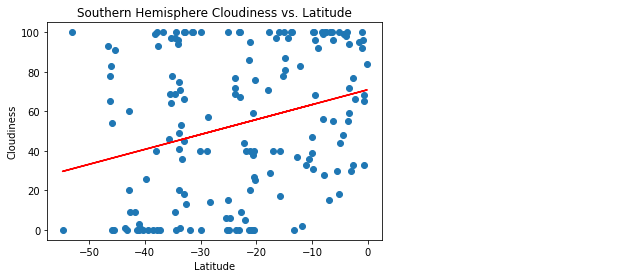

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
xlabel = 'Latitude'
ylabel = 'Cloudiness'
title = 'Southern Hemisphere Cloudiness vs. Latitude'
get_linear_regress(x_values,y_values,xlabel, ylabel,title)

Discussion about the linear relationship: This linear regression graph shows that there does not seem to be a strong relationship between cloudiness and latitude in the Southern Hemisphere. There does seem to be clustering around points -10 and 0.

### Wind Speed vs. Latitude Linear Regression Plot

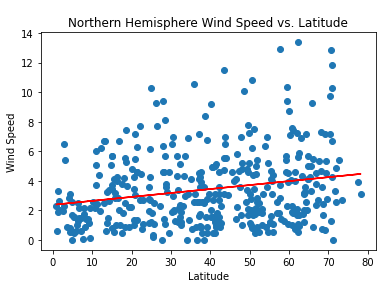

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
xlabel = 'Latitude'
ylabel = 'Wind Speed'
title = 'Northern Hemisphere Wind Speed vs. Latitude'
get_linear_regress(x_values,y_values,xlabel, ylabel,title)

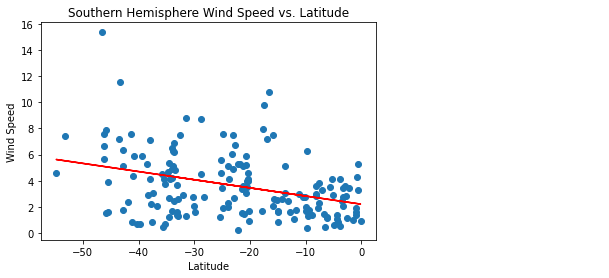

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
xlabel = 'Latitude'
ylabel = 'Wind Speed'
title = 'Southern Hemisphere Wind Speed vs. Latitude'
get_linear_regress(x_values,y_values,xlabel, ylabel,title)

Discussion about the linear relationship:This graph appers to show that there is a relationship between wind speed and latitude 

This linear regression graph shows a strong relationshp betweeen wind speed and latitude with clustering aroud -20
- 0 